In [1]:
from keras.datasets import fashion_mnist

In [3]:
(train_x,train_y),(test_x,test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
import numpy as np

In [6]:
model.fit(train_x.astype(np.float32),train_y.astype(np.float32),epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 2.7206 - accuracy: 0.6893 - val_loss: 0.8363 - val_accuracy: 0.7028
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6729 - accuracy: 0.7696 - val_loss: 0.6264 - val_accuracy: 0.7860
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5845 - accuracy: 0.7999 - val_loss: 0.5300 - val_accuracy: 0.8145
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5342 - accuracy: 0.8169 - val_loss: 0.5101 - val_accuracy: 0.8225
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5106 - accuracy: 0.8261 - val_loss: 0.5570 - val_accuracy: 0.8193


In [7]:
loss,acc = model.evaluate(test_x,test_y)
print(loss)
print(acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.5960 - accuracy: 0.8102
0.5960224866867065
0.8101999759674072


In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# To know the labels list
def check_label(id_,labels):
    label = train_y[id_]
    if label not in labels:
        plt.imshow(train_x[id_])
        print(label)
        plt.show()
    return label

9


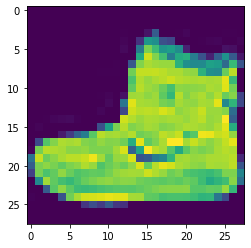

0


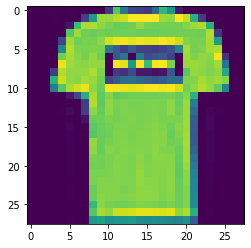

3


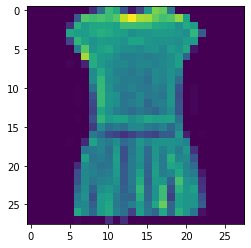

2


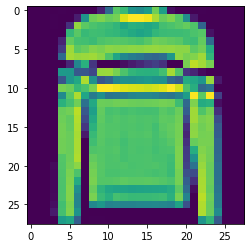

7


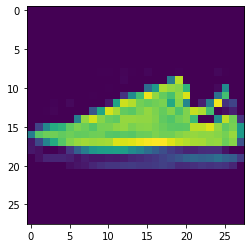

5


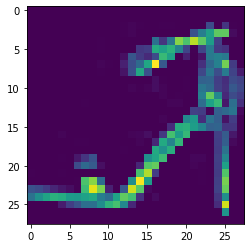

1


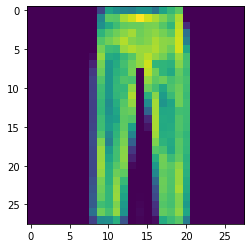

6


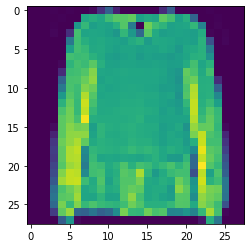

4


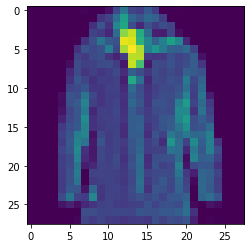

8


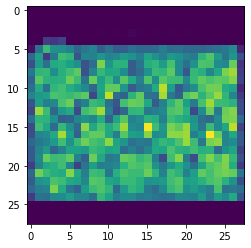

In [10]:
#To know unqiue Labels 
labels=[]
i=0;
while len(labels)<10:
    label = check_label(i,labels)
    if label not in labels:
        labels.append(label)
    i+=1

In [11]:
def predict(id_):
    labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots'] # Insert After Running Above Code
    predictions = model.predict(test_x[id_:id_+1])
    label = labels[np.argmax(predictions)]
    print(label)
    plt.imshow(test_x[id_])
    plt.show()

1/1 [==============================] - 0s 190ms/step
trouser


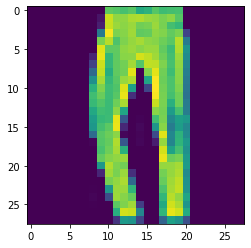

In [12]:
predict(5)

1/1 [==============================] - 0s 42ms/step
coat


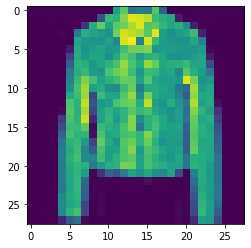

1/1 [==============================] - 0s 57ms/step
sandal


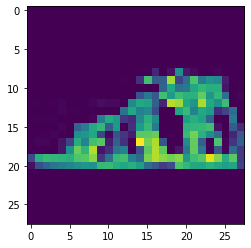

1/1 [==============================] - 0s 50ms/step
bag


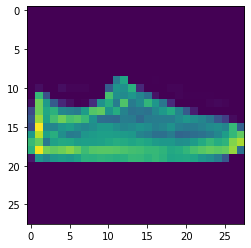

1/1 [==============================] - 0s 52ms/step
dress


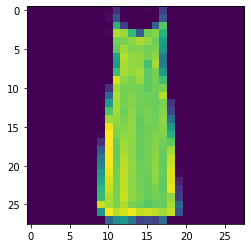

1/1 [==============================] - 0s 48ms/step
coat


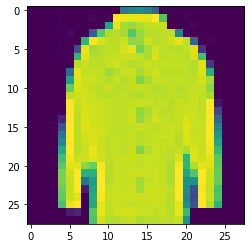

1/1 [==============================] - 0s 37ms/step
trouser


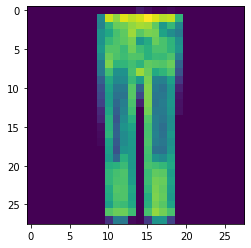

1/1 [==============================] - 0s 42ms/step
pullover


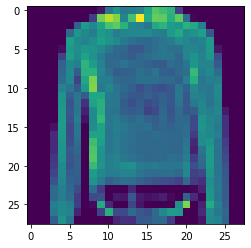

1/1 [==============================] - 0s 43ms/step
coat


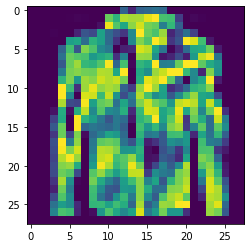

1/1 [==============================] - 0s 44ms/step
bag


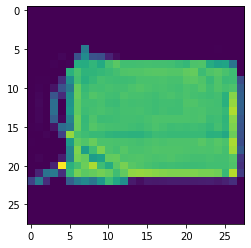

1/1 [==============================] - 0s 39ms/step
t_shirt


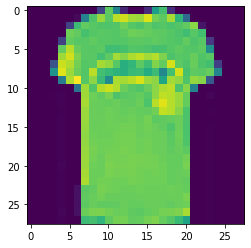

In [13]:
for i in range(10,20):
    predict(i)